In [117]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [118]:
X_train = np.load("data/X.npy")
y_train = np.load("data/y.npy")

In [119]:
X_train[0].shape

(400,)

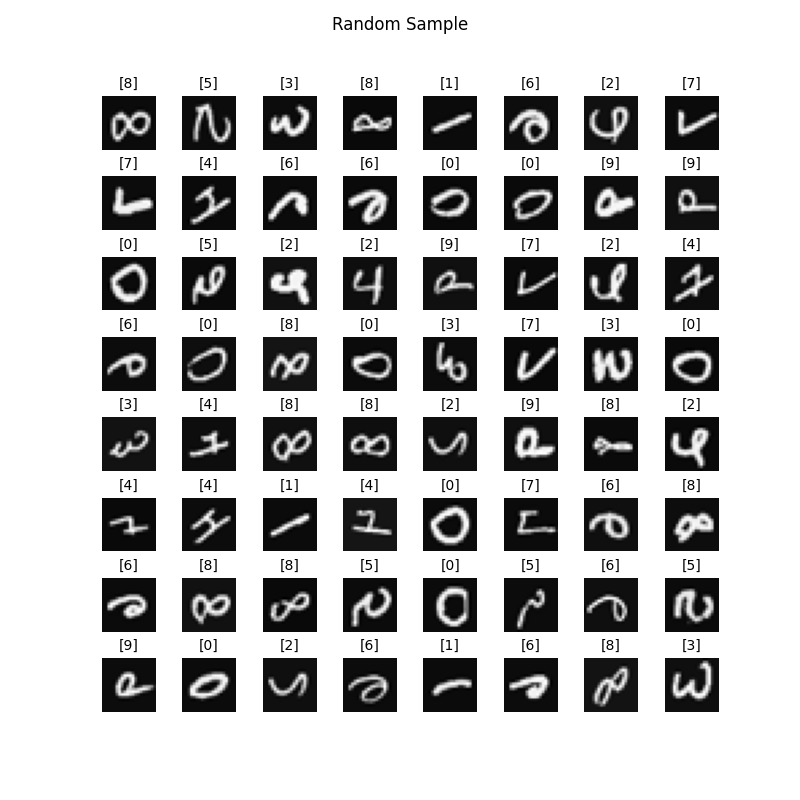

In [120]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(wspace=0.4, hspace=0.5)
fig.suptitle("Random Sample")
for ax in axes.flat:
    random_index = np.random.randint(5000)
    ax.imshow(X_train[random_index].reshape(20, 20), cmap="gray")
    ax.set_title(f"{y_train[random_index]}", fontsize=10)
    ax.set_axis_off()

### Using Vanilla SoftMax without Adam optimizer and logits

In [121]:
model = Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(units=25, activation="relu"),
    Dense(units=16, activation="relu"),
    Dense(units=10, activation="softmax")
])
model.compile(loss=SparseCategoricalCrossentropy())

In [ ]:
model.fit(X_train, y_train, epochs=100)

In [123]:
current_index = np.random.randint(5000)
prediction = model(X_train[current_index].reshape(1, -1)).numpy()
predicted_digit = np.where(prediction==prediction.max())[1][0]
print(predicted_digit)
actual_digit = y_train[current_index][0]
print(actual_digit)

3
3


In [124]:
incorrect_indexes = []
incorrect_values = []
for current_index in range(5000):
    prediction = model(X_train[current_index].reshape(1, -1)).numpy()
    predicted_digit = np.where(prediction==prediction.max())[1][0]
    actual_digit = y_train[current_index][0]
    if(actual_digit!=predicted_digit):
        incorrect_indexes.append(current_index)
        incorrect_values.append(predicted_digit)

In [132]:
incorrect_indexes # No Incorrect Indexes! Found some previously but not anymore 

[]

In [131]:
# fig, axes = plt.subplots(3, 3, figsize=(8, 8))
# fig.subplots_adjust(wspace=0.4, hspace=0.5)
# fig.suptitle(r"Actual(y), Predicted($\^y$)")
# for i in range(len(incorrect_indexes)):
#     ax = axes.flat[i]
#     ax.imshow(X_train[incorrect_indexes[i]].reshape(20, 20), cmap="gray")
#     ax.set_title(f"{y_train[incorrect_indexes[i]][0]}, {incorrect_values[i]}", fontsize=10)
#     ax.set_axis_off()

### Using Softmax with Adam and logits

In [126]:
new_model = Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(units=25, activation="relu"),
    Dense(units=16, activation="relu"),
    Dense(units=10, activation="linear")
])
new_model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer=Adam(learning_rate=0.01))

In [ ]:
new_model.fit(X_train, y_train, epochs=100)

In [128]:
current_index = np.random.randint(5000)
prediction = new_model(X_train[current_index].reshape(1, -1))
prediction = tf.nn.softmax(prediction).numpy()
predicted_digit = np.where(prediction==prediction.max())[1][0]
print(predicted_digit)
actual_digit = y_train[current_index][0]
print(actual_digit)

1
1


In [129]:
incorrect_indexes = []
incorrect_values = []
for current_index in range(5000):
    prediction = new_model(X_train[current_index].reshape(1, -1)).numpy()
    predicted_digit = np.where(prediction==prediction.max())[1][0]
    actual_digit = y_train[current_index][0]
    if(actual_digit!=predicted_digit):
        incorrect_indexes.append(current_index)
        incorrect_values.append(predicted_digit)

In [130]:
incorrect_indexes # What in the? NO INCORRECT PREDICTIONS! WHOA....

[]